In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/add_l/Desktop/New folder/3.Project 3-Predict Stock Prices/BAJFINANCE.csv')

In [4]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [5]:
data.set_index('Date', inplace=True)

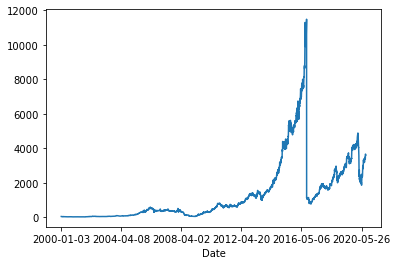

In [6]:
data['VWAP'].plot()

In [7]:
data.shape

(5070, 14)

In [8]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [9]:
df = data.copy()

In [10]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [11]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 = 3
window2 = 7

In [12]:
for feature in lag_features:
    df[feature + 'window1' + 'mean'] = df[feature].rolling(window = window1).mean()
    df[feature + 'window2' + 'mean'] = df[feature].rolling(window = window2).mean()

for feature in lag_features:
    df[feature + 'window1' + 'std'] = df[feature].rolling(window = window1).std()
    df[feature + 'window2' + 'Std'] = df[feature].rolling(window = window2).std()    
    

In [13]:
df.dropna(inplace=True)

In [14]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highwindow1mean', 'Highwindow2mean', 'Lowwindow1mean',
       'Lowwindow2mean', 'Volumewindow1mean', 'Volumewindow2mean',
       'Turnoverwindow1mean', 'Turnoverwindow2mean', 'Tradeswindow1mean',
       'Tradeswindow2mean', 'Highwindow1std', 'Highwindow2Std',
       'Lowwindow1std', 'Lowwindow2Std', 'Volumewindow1std',
       'Volumewindow2Std', 'Turnoverwindow1std', 'Turnoverwindow2Std',
       'Tradeswindow1std', 'Tradeswindow2Std'],
      dtype='object')

In [15]:
df.shape

(2285, 34)

In [16]:
training_data = df[0:1800]
test_data = df[1800:]

In [17]:
!pip install pmdarima

distutils: c:\users\add_l\anaconda3\Include\UNKNOWN
sysconfig: c:\users\add_l\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\add_l\anaconda3\Include\UNKNOWN
sysconfig: c:\users\add_l\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\add_l\anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
!pip install pmdarima --user

distutils: C:\Users\add_l\AppData\Roaming\Python\Python38\Include\UNKNOWN
sysconfig: C:\Users\add_l\AppData\Roaming\Python\Python38\Include
user = True
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\add_l\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
from pmdarima import auto_arima

In [20]:
ind_features = ['Highwindow1mean', 'Highwindow2mean', 'Lowwindow1mean',
       'Lowwindow2mean', 'Volumewindow1mean', 'Volumewindow2mean',
       'Turnoverwindow1mean', 'Turnoverwindow2mean', 'Tradeswindow1mean',
       'Tradeswindow2mean', 'Highwindow1std', 'Highwindow2Std',
       'Lowwindow1std', 'Lowwindow2Std', 'Volumewindow1std',
       'Volumewindow2Std', 'Turnoverwindow1std', 'Turnoverwindow2Std',
       'Tradeswindow1std', 'Tradeswindow2Std']

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
model = auto_arima(y = training_data['VWAP'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.530, Time=8.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.221, Time=4.67 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.344, Time=4.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.316, Time=5.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=3.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.231, Time=5.83 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 33.021 seconds


In [23]:
model.fit(training_data['VWAP'], training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [41]:
forecast = model.predict(n_periods = len(test_data), exogenous=test_data[ind_features])

In [42]:
test_data['forecast_ARIMA'] = forecast

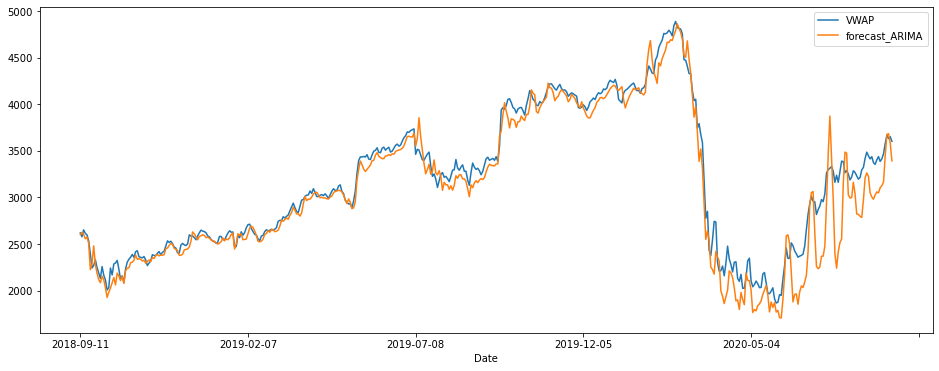

In [43]:
test_data[['VWAP','forecast_ARIMA']].plot(figsize=(16,6))

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

187.77369743124692